<h3>1. Linear Regression</h3>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Load pre-split reduced datasets
train_features = pd.read_csv('data/train_features_original.csv')
train_labels = pd.read_csv('data/train_labels.csv').values.ravel()  # Flattening labels
val_features = pd.read_csv('data/val_features_original.csv')
val_labels = pd.read_csv('data/val_labels.csv').values.ravel()      # Flattening labels
test_features = pd.read_csv('data/test_features_original.csv')
test_labels = pd.read_csv('data/test_labels.csv').values.ravel()    # Flattening labels

# Define the model and parameter grid
model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

# Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)

# Select the best model and make predictions
best_model = grid_search.best_estimator_
val_predictions = best_model.predict(val_features)
test_predictions = best_model.predict(test_features)

# Define a function to calculate and print metrics in a table
def print_regression_metrics(true_labels, predictions, dataset_name):
    mse = mean_squared_error(true_labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_labels, predictions)
    mape = mean_absolute_percentage_error(true_labels, predictions)
    r2 = r2_score(true_labels, predictions)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"{'Metric':<25}{'Value':<10}")
    print(f"{'-'*35}")
    print(f"{'Mean Squared Error (MSE)':<25}{mse:.4f}")
    print(f"{'Root Mean Squared Error (RMSE)':<25}{rmse:.4f}")
    print(f"{'Mean Absolute Error (MAE)':<25}{mae:.4f}")
    print(f"{'Mean Absolute Percentage Error (MAPE)':<25}{mape:.4%}")
    print(f"{'R^2 Score':<25}{r2:.4f}")

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Calculate and print metrics for validation and test sets
print_regression_metrics(val_labels, val_predictions, 'Validation')
print_regression_metrics(test_labels, test_predictions, 'Test')


Best Parameters: {'fit_intercept': False}

Validation Metrics:
Metric                   Value     
-----------------------------------
Mean Squared Error (MSE) 0.2066
Root Mean Squared Error (RMSE)0.4546
Mean Absolute Error (MAE)0.3553
Mean Absolute Percentage Error (MAPE)174.9979%
R^2 Score                0.7944

Test Metrics:
Metric                   Value     
-----------------------------------
Mean Squared Error (MSE) 0.2096
Root Mean Squared Error (RMSE)0.4578
Mean Absolute Error (MAE)0.3563
Mean Absolute Percentage Error (MAPE)196.1022%
R^2 Score                0.7900


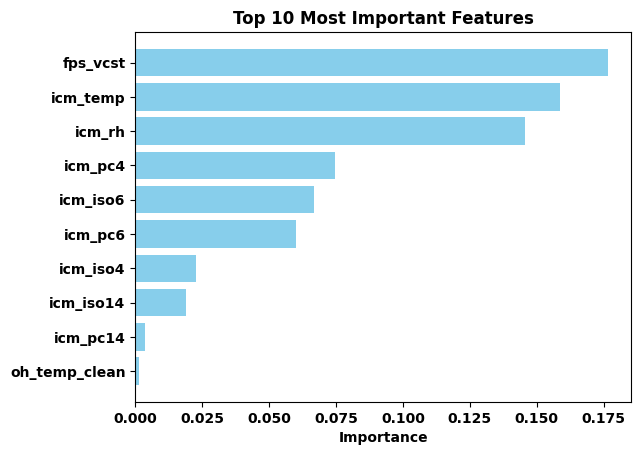

         Feature  Importance
0  oh_temp_clean    0.001550
1       icm_pc14    0.003570
2      icm_iso14    0.018955
3       icm_iso4    0.022707
4        icm_pc6    0.059925
5       icm_iso6    0.066866
6        icm_pc4    0.074764
7         icm_rh    0.145609
8       icm_temp    0.158836
9       fps_vcst    0.176562


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get and sort feature importance
importance = np.abs(best_model.coef_)
sorted_idx = importance.argsort()

# Visualize top 10 most important features
plt.barh(train_features.columns[sorted_idx][:10], importance[sorted_idx][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.show()

# Print the top 10 most important features
print(pd.DataFrame({'Feature': train_features.columns[sorted_idx][:10], 'Importance': importance[sorted_idx][:10]}))


<h3>2. Random Forest Regression</h3>

In [4]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Load pre-split datasets
train_features = pd.read_csv('data/train_features_original.csv')
train_labels = pd.read_csv('data/train_labels.csv').values.ravel()  # Flattening labels
val_features = pd.read_csv('data/val_features_original.csv')  
val_labels = pd.read_csv('data/val_labels.csv').values.ravel()      # Flattening labels
test_features = pd.read_csv('data/test_features_original.csv')
test_labels = pd.read_csv('data/test_labels.csv').values.ravel()    # Flattening labels

# Define and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_features, train_labels)

# Make predictions on validation and test sets
val_predictions = model.predict(val_features)
test_predictions = model.predict(test_features)

# Define a function to calculate and print metrics in a table format
def print_regression_metrics(true_labels, predictions, dataset_name):
    mse = mean_squared_error(true_labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_labels, predictions)
    mape = mean_absolute_percentage_error(true_labels, predictions)
    r2 = r2_score(true_labels, predictions)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"{'Metric':<30}{'Value':<10}")
    print(f"{'-'*40}")
    print(f"{'Mean Squared Error (MSE)':<30}{mse:.4f}")
    print(f"{'Root Mean Squared Error (RMSE)':<30}{rmse:.4f}")
    print(f"{'Mean Absolute Error (MAE)':<30}{mae:.4f}")
    print(f"{'Mean Absolute Percentage Error (MAPE)':<30}{mape:.4%}")
    print(f"{'R^2 Score':<30}{r2:.4f}")

# Calculate and print metrics for validation and test sets
print_regression_metrics(val_labels, val_predictions, 'Validation')
print_regression_metrics(test_labels, test_predictions, 'Test')



Validation Metrics:
Metric                        Value     
----------------------------------------
Mean Squared Error (MSE)      0.0164
Root Mean Squared Error (RMSE)0.1280
Mean Absolute Error (MAE)     0.0384
Mean Absolute Percentage Error (MAPE)23.3459%
R^2 Score                     0.9837

Test Metrics:
Metric                        Value     
----------------------------------------
Mean Squared Error (MSE)      0.0175
Root Mean Squared Error (RMSE)0.1321
Mean Absolute Error (MAE)     0.0388
Mean Absolute Percentage Error (MAPE)19.5335%
R^2 Score                     0.9825


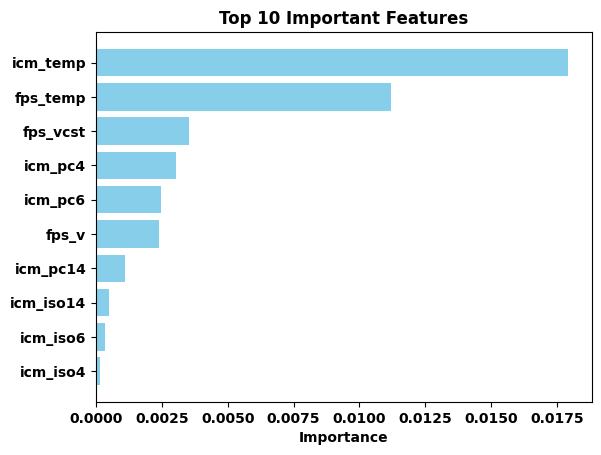

     Feature  Importance
0   icm_iso4    0.000171
1   icm_iso6    0.000359
2  icm_iso14    0.000491
3   icm_pc14    0.001099
4      fps_v    0.002378
5    icm_pc6    0.002454
6    icm_pc4    0.003040
7   fps_vcst    0.003533
8   fps_temp    0.011192
9   icm_temp    0.017925


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance and sort
importance = model.feature_importances_
sorted_idx = importance.argsort()

# Visualize top 10 important features
plt.barh(train_features.columns[sorted_idx][:10], importance[sorted_idx][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()

# Print the top 10 most important features
print(pd.DataFrame({'Feature': train_features.columns[sorted_idx][:10], 'Importance': importance[sorted_idx][:10]}))


<h3>3. Gradient Boosting Regression</h3>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Load pre-split reduced datasets
train_features = pd.read_csv('data/train_features_original.csv', header=0)
train_labels = pd.read_csv('data/train_labels.csv', header=0).values.ravel()
val_features = pd.read_csv('data/val_features_original.csv', header=0)
val_labels = pd.read_csv('data/val_labels.csv', header=0).values.ravel()
test_features = pd.read_csv('data/test_features_original.csv', header=0)
test_labels = pd.read_csv('data/test_labels.csv', header=0).values.ravel()

# Define the Gradient Boosting Regressor and reduced parameter grid
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],  # Limited number of estimators
    'learning_rate': [0.1],      # Reduced learning rate
    'max_depth': [3],            # Limited depth
    'subsample': [0.8],
    'min_samples_split': [2]
}

# Grid Search with cross-validation and parallelism (n_jobs=-1 to use all cores)
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train_features, train_labels)

# Select the best model and make predictions
best_model = grid_search.best_estimator_
val_predictions = best_model.predict(val_features)
test_predictions = best_model.predict(test_features)

# Define a function to print and display all regression metrics
def print_regression_metrics(true_labels, predictions, dataset_name):
    mse = mean_squared_error(true_labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_labels, predictions)
    mape = mean_absolute_percentage_error(true_labels, predictions)
    r2 = r2_score(true_labels, predictions)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"{'Metric':<30}{'Value':<10}")
    print(f"{'-'*40}")
    print(f"{'Mean Squared Error (MSE)':<30}{mse:.4f}")
    print(f"{'Root Mean Squared Error (RMSE)':<30}{rmse:.4f}")
    print(f"{'Mean Absolute Error (MAE)':<30}{mae:.4f}")
    print(f"{'Mean Absolute Percentage Error (MAPE)':<30}{mape:.4%}")
    print(f"{'R^2 Score':<30}{r2:.4f}")

# Print the best parameters from GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# Print metrics for validation and test sets
print_regression_metrics(val_labels, val_predictions, 'Validation')
print_regression_metrics(test_labels, test_predictions, 'Test')


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}

Validation Metrics:
Metric                        Value     
----------------------------------------
Mean Squared Error (MSE)      0.0491
Root Mean Squared Error (RMSE)0.2215
Mean Absolute Error (MAE)     0.1115
Mean Absolute Percentage Error (MAPE)49.2644%
R^2 Score                     0.9512

Test Metrics:
Metric                        Value     
----------------------------------------
Mean Squared Error (MSE)      0.0495
Root Mean Squared Error (RMSE)0.2224
Mean Absolute Error (MAE)     0.1122
Mean Absolute Percentage Error (MAPE)48.7752%
R^2 Score                     0.9504


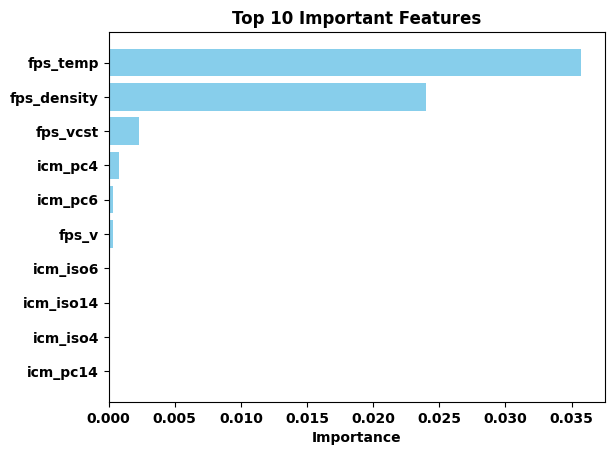

       Feature  Importance
0     icm_pc14    0.000008
1     icm_iso4    0.000022
2    icm_iso14    0.000031
3     icm_iso6    0.000037
4        fps_v    0.000366
5      icm_pc6    0.000368
6      icm_pc4    0.000774
7     fps_vcst    0.002262
8  fps_density    0.024030
9     fps_temp    0.035712


In [7]:
# Get feature importance and sort
importance = best_model.feature_importances_
sorted_idx = importance.argsort()

# Visualize top 10 important features
plt.barh(train_features.columns[sorted_idx][:10], importance[sorted_idx][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.show()

# Print the top 10 most important features
print(pd.DataFrame({'Feature': train_features.columns[sorted_idx][:10], 'Importance': importance[sorted_idx][:10]}))
